In [1]:
# initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
import os
from MCForecastTools import MCSimulation
import json
import requests 

In [17]:
!pip install cbpro

     |████████████████████████████████| 584 kB 9.0 MB/s eta 0:00:01
     |████████████████████████████████| 196 kB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 29.7 MB/s eta 0:00:01
  Created wheel for pymongo: filename=pymongo-3.5.1-cp38-cp38-macosx_10_9_x86_64.whl size=274018 sha256=2538ed9badadb5ea18cf7c27222ba132f4455ff95b86918d98a67511c8d68249
  Stored in directory: /Users/matthewblair/Library/Caches/pip/wheels/88/af/7d/0e7d8f2c24685fe76da90d9ea766074000b1c2c643a38d8c1e
  Created wheel for websocket-client: filename=websocket_client-0.40.0-py2.py3-none-any.whl size=198286 sha256=c7dd65368d0f625fc164354e5cd6d50ccb4a894f3f59177afe386105269197a9
  Stored in directory: /Users/matthewblair/Library/Caches/pip/wheels/15/dd/3a/2d095a188c6ea8203aa8fc1cdab6138168a4a0b7776263dcc9
Successfully built pymongo websocket-client
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  At

In [2]:
def fetch_daily_data(symbol):
    pair_split = symbol.split('/')
    symbol = pair_split[0] +'-' + pair_split[1]
    #print(symbol)
    url = f'https://api.pro.coinbase.com/products/{symbol}/candles?granularity=86400'
    response = requests.get(url)
    #print(response.status_code)
    if response.status_code ==200:
        data = pd.DataFrame(json.loads(response.text), columns=['unix','low','high','open','close','volume'])
        data['date']=pd.to_datetime(data['unix'],unit='s')
        data['vol_fiat']= data['volume']*data['close']
        
        if data is None:
            print("Did not return any data from coinbase for this symbol")
        else:
            data.to_csv(f'Coinbase_{pair_split[0]+ pair_split[1]}_dailydata.csv', index=False)
        
    else: 
        print("Did not receive Ok response from Coinbase API")
            
    return data       
            
    #if __name__ == "__main__":
        #pair= "BTC/USD"
        #fetch_daily_data(symbol=pair)

In [3]:
fetch_daily_data('BTC/USD')

BTC-USD
200


,unix,low,high,open,close,volume,date,vol_fiat
0,1632528000,41675.00,42998.76,42848.44,42557.87,6270.949129,2021-09-25,2.668782e+08
1,1632441600,40683.29,45200.00,44896.55,42848.92,22451.577115,2021-09-24,9.620258e+08
2,1632355200,43096.73,45000.00,43575.19,44897.59,13446.874687,2021-09-23,6.037323e+08
3,1632268800,40570.42,44035.44,40736.81,43575.10,19462.538652,2021-09-22,8.480821e+08
4,1632182400,39600.00,43639.88,43007.69,40719.60,27275.338182,2021-09-21,1.110641e+09
...,...,...,...,...,...,...,...,...
295,1607040000,18576.05,19546.46,19446.43,18658.10,16382.877392,2020-12-04,3.056734e+08
296,1606953600,18885.00,19625.64,19222.45,19448.64,14648.296834,2020-12-03,2.848895e+08
297,1606867200,18335.00,19340.00,18778.18,19225.63,16227.136374,2020-12-02,3.119769e+08
298,1606780800,18109.00,19915.14,19713.94,18782.97,30442.865437,2020-12-01,5.718074e+08


In [8]:
btc_df = fetch_daily_data('BTC/USD')
btc_df.head()

BTC-USD
200


,unix,low,high,open,close,volume,date,vol_fiat
0,1632528000,41675.00,42998.76,42848.44,42619.66,6335.407696,2021-09-25,2.700129e+08
1,1632441600,40683.29,45200.00,44896.55,42848.92,22451.577115,2021-09-24,9.620258e+08
2,1632355200,43096.73,45000.00,43575.19,44897.59,13446.874687,2021-09-23,6.037323e+08
3,1632268800,40570.42,44035.44,40736.81,43575.10,19462.538652,2021-09-22,8.480821e+08
4,1632182400,39600.00,43639.88,43007.69,40719.60,27275.338182,2021-09-21,1.110641e+09


In [13]:
# Drop unnecessary columns

btc_df.drop(columns=['volume', 'open', 'high', 'low','vol_fiat','unix'], inplace=True)
btc_df.head()

KeyError: "['volume' 'open' 'high' 'low'] not found in axis"

In [5]:
fetch_daily_data('ETH/USD')

ETH-USD
200


,unix,low,high,open,close,volume,date,vol_fiat
0,1632528000,2800.01,2968.85,2930.59,2894.04,110799.514130,2021-09-25,3.206582e+08
1,1632441600,2735.00,3160.48,3154.42,2930.61,365024.832046,2021-09-24,1.069745e+09
2,1632355200,3035.83,3182.34,3078.42,3154.62,166485.493009,2021-09-23,5.251985e+08
3,1632268800,2738.24,3090.83,2765.33,3078.43,271497.545908,2021-09-22,8.357862e+08
4,1632182400,2651.00,3104.82,2976.36,2765.69,441567.873694,2021-09-21,1.221240e+09
...,...,...,...,...,...,...,...,...
295,1607040000,566.00,620.56,616.46,567.60,195480.706292,2020-12-04,1.109548e+08
296,1606953600,586.11,624.57,597.03,616.65,168346.304014,2020-12-03,1.038107e+08
297,1606867200,575.08,604.96,585.87,597.35,136242.164408,2020-12-02,8.138426e+07
298,1606780800,563.01,636.53,617.00,586.03,373179.797756,2020-12-01,2.186946e+08


In [7]:
eth_df = fetch_daily_data('ETH/USD')
eth_df.head()

ETH-USD
200


,unix,low,high,open,close,volume,date,vol_fiat
0,1632528000,2800.01,2968.85,2930.59,2894.04,110799.514130,2021-09-25,3.206582e+08
1,1632441600,2735.00,3160.48,3154.42,2930.61,365024.832046,2021-09-24,1.069745e+09
2,1632355200,3035.83,3182.34,3078.42,3154.62,166485.493009,2021-09-23,5.251985e+08
3,1632268800,2738.24,3090.83,2765.33,3078.43,271497.545908,2021-09-22,8.357862e+08
4,1632182400,2651.00,3104.82,2976.36,2765.69,441567.873694,2021-09-21,1.221240e+09


In [ ]:
eth_df.drop(columns=['volume', 'open', 'high', 'low','vol_fiat','unix'], inplace=True)
eth_df.head()

In [8]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()
# Set API key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [18]:
# Set the ticker
ticker = "BTC"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year from Today
start_date = pd.Timestamp("2020-09-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-01", tz="America/New_York").isoformat()

# Get 1 year worth of historical data for BTC
ticker_data_btc_1 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data_btc_1.head()


BTC                                
                              open    high     low    close volume
2021-04-16 00:00:00-04:00  100.890  100.89  98.770  99.2700   2795
2021-04-19 00:00:00-04:00   99.120   99.13  98.985  99.1012   3761
2021-04-20 00:00:00-04:00   98.790   99.30  98.790  98.8800   3259
2021-04-21 00:00:00-04:00   99.010   99.01  98.900  98.9000    386
2021-04-22 00:00:00-04:00   98.925   99.04  98.860  98.9100   1153

In [16]:
print(alpaca_api_key)

AKRJLCP6OHSXG1NBOWX6


In [19]:
# Set the ticker
ticker = "ETH"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 years from Today
start_date = pd.Timestamp("2020-09-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-01", tz="America/New_York").isoformat()

# Get 1 year worth of historical data for ETH
ticker_data_eth_1 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data_eth_1.head()

ETH                             
                            open   high    low  close  volume
2020-09-01 00:00:00-04:00  14.26  14.87  14.18  14.82  383196
2020-09-02 00:00:00-04:00  14.82  14.97  14.52  14.78  425260
2020-09-03 00:00:00-04:00  14.87  15.01  14.39  14.48  415214
2020-09-04 00:00:00-04:00  14.73  14.75  14.34  14.51  363816
2020-09-08 00:00:00-04:00  14.36  15.04  14.31  14.64  461389

In [20]:
# Set the ticker
ticker = "BTC"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from 9/1/2018
start_date = pd.Timestamp("2018-09-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-01", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for BTC
ticker_data_btc_3 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data_btc_3.head()

BTC                                
                              open    high     low    close volume
2021-04-16 00:00:00-04:00  100.890  100.89  98.770  99.2700   2795
2021-04-19 00:00:00-04:00   99.120   99.13  98.985  99.1012   3761
2021-04-20 00:00:00-04:00   98.790   99.30  98.790  98.8800   3259
2021-04-21 00:00:00-04:00   99.010   99.01  98.900  98.9000    386
2021-04-22 00:00:00-04:00   98.925   99.04  98.860  98.9100   1153

In [22]:
# Set the ticker
ticker = "ETH"

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 3 years from 09-01-2018
start_date = pd.Timestamp("2018-09-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-09-01", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for ETH
ticker_data_eth_3 = api.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

ticker_data_eth_3.head()

ETH                             
                            open   high    low  close  volume
2018-09-04 00:00:00-04:00  22.20  22.30  21.90  22.25  171543
2018-09-05 00:00:00-04:00  22.15  22.35  21.95  22.25  257643
2018-09-06 00:00:00-04:00  22.35  22.35  21.95  22.25  179424
2018-09-07 00:00:00-04:00  22.05  22.55  21.95  22.50  317475
2018-09-10 00:00:00-04:00  22.70  23.10  22.25  23.00  307513

<AxesSubplot:>

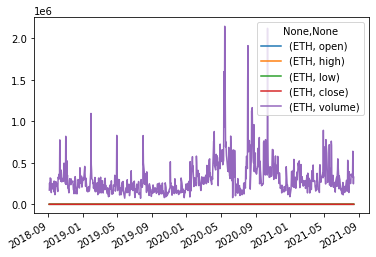

In [27]:
ticker_data_eth_3.plot()

In [29]:
# Set number of simulations
num_sims = 1000
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = ticker_data_btc_3,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*5
)
# Print the simulation input data
MC_even_dist.portfolio_data.head()

BTC                                  \
                              open    high     low    close volume   
2021-04-16 00:00:00-04:00  100.890  100.89  98.770  99.2700   2795   
2021-04-19 00:00:00-04:00   99.120   99.13  98.985  99.1012   3761   
2021-04-20 00:00:00-04:00   98.790   99.30  98.790  98.8800   3259   
2021-04-21 00:00:00-04:00   99.010   99.01  98.900  98.9000    386   
2021-04-22 00:00:00-04:00   98.925   99.04  98.860  98.9100   1153   

                                        
                          daily_return  
2021-04-16 00:00:00-04:00          NaN  
2021-04-19 00:00:00-04:00    -0.001700  
2021-04-20 00:00:00-04:00    -0.002232  
2021-04-21 00:00:00-04:00     0.000202  
2021-04-22 00:00:00-04:00     0.000101

In [30]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001006,1.000712,1.000254,0.998981,0.999840,1.000310,0.999302,0.998863,0.999428,0.998692,...,1.000184,0.998274,0.998635,0.999666,0.999332,1.000531,0.999355,0.999583,1.001355,0.998420
2,1.000380,0.999177,1.000798,0.998624,1.000499,0.998034,0.999277,0.998206,0.998824,0.997420,...,0.998112,0.999410,0.999848,1.000379,0.997493,1.000396,0.999220,1.000812,1.000482,0.997201
3,0.999499,1.000213,1.001066,0.998126,1.000473,0.997822,0.998192,0.997634,0.997814,0.997431,...,0.997414,0.999189,1.000473,1.000607,0.997151,1.000316,0.997973,1.001014,0.998594,0.996696
4,0.998791,1.001208,1.001548,0.998305,0.999789,0.999063,0.997097,0.998684,0.997055,0.998641,...,0.997457,1.000539,1.000041,1.000653,0.995899,1.000643,0.998732,1.001446,0.998834,0.995466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.900924,0.899503,0.909721,0.899426,0.836899,0.886347,0.906731,0.865476,0.850753,0.865200,...,0.923571,0.936998,0.882906,0.873817,0.842793,0.890440,0.910255,0.897885,0.956884,0.875745
1257,0.901380,0.899894,0.908570,0.900222,0.836616,0.886435,0.905983,0.866567,0.851282,0.864205,...,0.923225,0.934452,0.882594,0.873712,0.843082,0.890648,0.910730,0.898332,0.958277,0.875969
1258,0.902806,0.899800,0.908813,0.900988,0.837648,0.886654,0.904786,0.865948,0.851057,0.864560,...,0.922868,0.933664,0.883792,0.875122,0.841459,0.893458,0.909247,0.897566,0.956681,0.874924
1259,0.903732,0.900905,0.908717,0.900715,0.837161,0.886164,0.902633,0.864636,0.850654,0.864605,...,0.922654,0.934744,0.883938,0.874441,0.842279,0.893963,0.910463,0.898179,0.954932,0.873796
